## Step 0: Introduction

We need to set-up several things and with a specific structure so that it's readable for the excursion optimizer and
learner object.
We have pre-loaded a python script for data on:
-  **True/Black-box function** (this is not a tutorial using funcX, just a simple toy function is all we need)
-  **Grid**: domain where you will search for next evaluation points?
<br /><br />We have pre-loaded a yaml script for algorithm options on:
-  **Gaussian Process**: which kernel and likelihood do you want to use?
-  **Algorithm Options**: which acquisition function? Do you want batch selection? How many points per batch? Which batch method selection?

There are many choices and a user might not know a priori what to use. That is why I am preparing a set of complete
examples that you just have to load to get started. These pre-build examples are in `excursion/???/*.py` these
`.py` scripts contain initialization for: true/black-box function and grid (the "numerical options"). The files in
`excursion/??/??/*.yml` are yaml files that contain pre-established Gaussian Processes and Algorithm Options
(the "algorithm options"). This way of ordering the init step makes it easy to fix a numerical problem while trying
different algorithm configurations and vice versa.
<br /><br /> The purpose of using the abstract interfaces for a learner object helps reduce the amount of interaction
users have with the torch library to a minimum. The complete examples provide the ability for the user to explore the entire
excursion library without having to write their own code.


In [14]:
import yaml
import json
%load_ext autoreload
%autoreload 2
import numpy as np
np.warnings.filterwarnings('ignore')
%matplotlib inline

from excursion.plotting import plot
from excursion.learner import Learner
from excursion.excursion import ExcursionProblem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1: Initialize algorithm options, details of the excursion problem, and black-box/truth function

The Learner object specifically is designed to automate construction of solving the excursion set estimation problem
by optimizing a Gaussian process with an active learning approach using a friendly ask-and-tell API. The Learner is a
wrapper for the excursion Optimizer class which executes the steps of the ?? optimization process ??.

The learner relies on an ExcursionProblem and ExcursionResult object which are created using the algorithm options and
provided truth function or black box .py script. (e.g. testcase_1D)

The excursion result can be used with the plotting module to visualize data created during the learners progress.

In [15]:
# # Import the example truth functions.

import excursion.test_suite.test_functions.fast_2D as testcase_2D
import excursion.test_suite.test_functions.fast_1D as testcase_1D


The provided example 'yaml' files are a required template for basic usage of the excursion package. These provide kwargs
necessary for package methods to run smoothly. The provided examples show multiple options available for the user to
explore. More options and functionality can be added by the advanced user.

In [16]:
file = open('../excursion/test_suite/algorithm_options/algorithm_specs_test.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))


algorithm_opts =
{
    "example": "Simple Learner Usage",
    "ninit": 3,
    "init_type": "random",
    "likelihood": {
        "likelihood_type": "GaussianLikelihood",
        "epsilon": 0.0
    },
    "model": {
        "type": "ExactGP",
        "fit_optimizer": "Adam"
    },
    "acq": {
        "acq_type": "mes"
    },
    "jump_start": true,
    "device": "auto",
    "dtype": "torch.float64"
}


The problem search Space must have some basic parameters defined.<br />
The dimension of your problems search space and the bounds of the search space.
(i.e. a bounded domain of the black-box/truth function)<br />
A list of thresholds at which you wish to learn on. The active learning approach will train the learner’s model
 (a Gaussian process) to be most accurate locally by the thresholds.<br />
The problem also needs a defined step size for the search space. The grid step size of the search space, and the acquisition
space can be defined separately if the search space is much larger than your local machine is capable of computing. <br />
The step size, and the bounding box can be defined differently in each dimension. <br />

In [17]:
thresholds = [0.0]
bounding_box = [[0.0, 1.5], [0.0, 1.5]]
ndim = 2
grid_step_size = [41]*ndim
acq_grid_step_size = grid_step_size
problem_two_details = ExcursionProblem(thresholds=thresholds, bounding_box=bounding_box, ndim=ndim, grid_step_size=grid_step_size,
                                       functions=testcase_2D.true_functions)


thresholds = [0.7]
bounding_box = [[0, 1]]
ndim = 1
grid_step_size = [100]
acq_grid_step_size = grid_step_size
problem_one_details = ExcursionProblem(thresholds=thresholds, bounding_box=bounding_box, ndim=ndim, grid_step_size=grid_step_size,
                                       functions=testcase_1D.true_functions)


## Step 2: Initialize the learner objects.
There are many ways we could have started our ??Bayesian optimization problem??. Using the provided example templates you
can avoid all of that using the Learner class. If you wanted your own special initialization you can use _Learner and
make your own.


In [18]:
# Here are 1D and 2D examples of the learner ask-and-tell API.
learner_one = Learner(problem_one_details, algorithm_opts)
learner_two = Learner(problem_two_details, algorithm_opts)


Accuracy % 0.94
Accuracy % 0.6020226055919096


In [19]:
learner_one.optimizer._model.train_inputs[0]

tensor([[0.2323],
        [0.0707],
        [0.0505]], device='cuda:0', dtype=torch.float64)

In [20]:
learner_two.optimizer.result.train_X

[array([[0.23232323],
        [0.07070707],
        [0.05050505]]),
 array([[1.425 , 1.0875],
        [1.3875, 0.7125],
        [1.0125, 1.4625]])]

I am trying plotting
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Going to skip plotting and keep training

If jump start: True we can plot the initial state
I am trying plotting
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Going to skip plotting and keep training

I am trying plotting


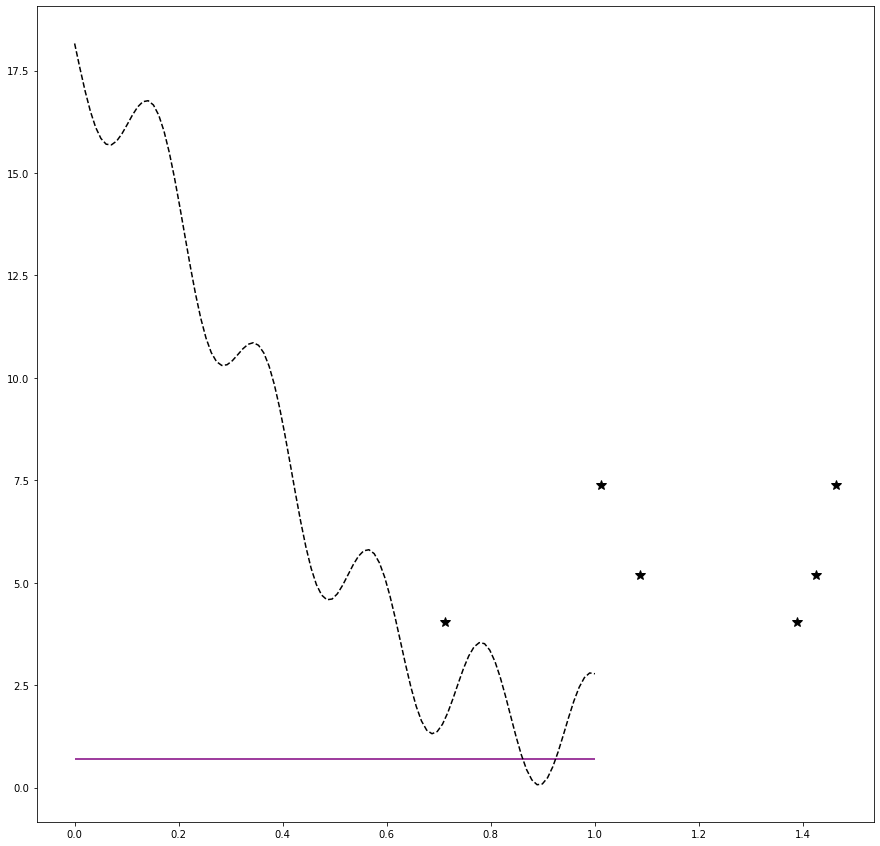

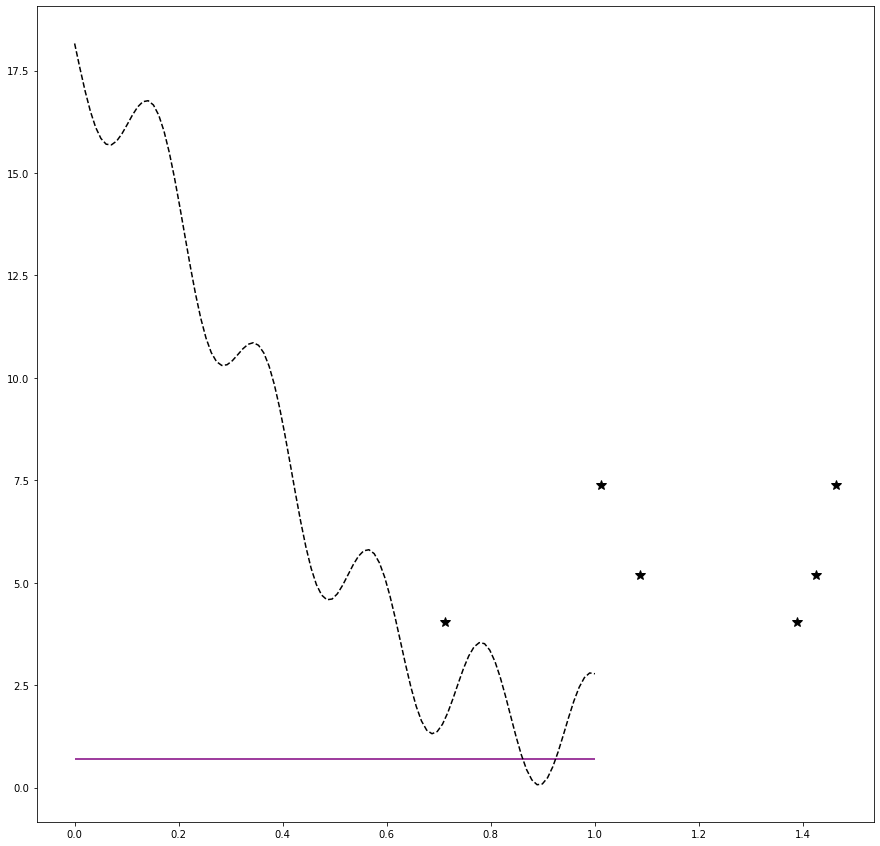

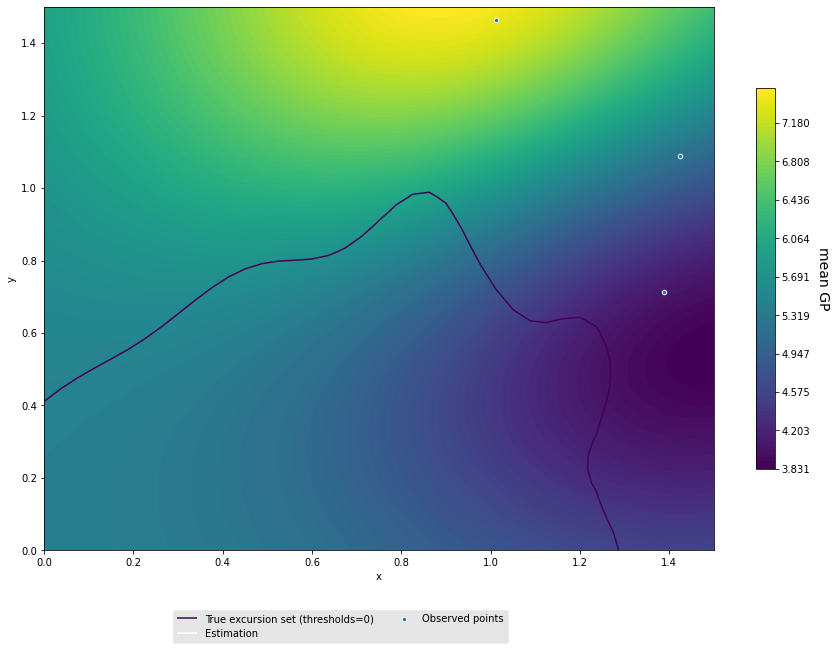

In [21]:
plot(learner_one.optimizer.result)


try:
    print("If jump start: "+str(algorithm_opts['jump_start'])+" we can plot the initial state")
    plot(learner_one.optimizer.result)
    plot(learner_two.optimizer.result)
except ValueError as error:
    print(error)

## Step 3: Run the optimization loop.
There are two ways to do this. If the problem details have properly provided a function handle then one can run the loop
with the extra functions provided by learner. If not they must use the ask-and-tell style loop.

tensor([[0.7172]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.94


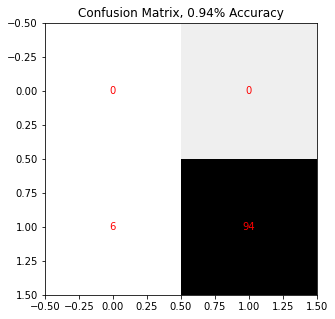

I am trying plotting


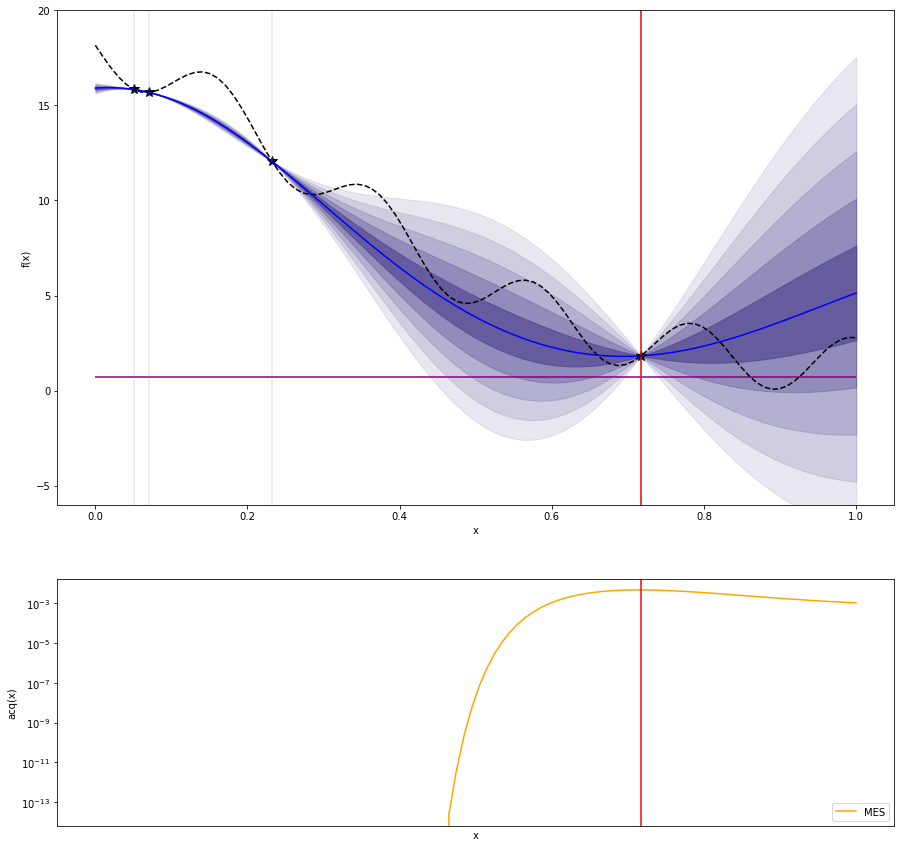

tensor([[0.7125, 0.0000]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8637715645449138


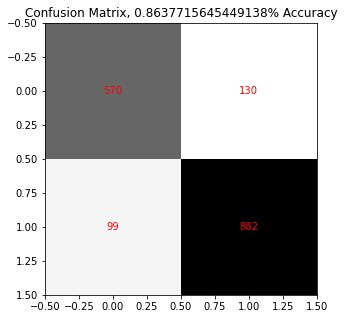

I am trying plotting


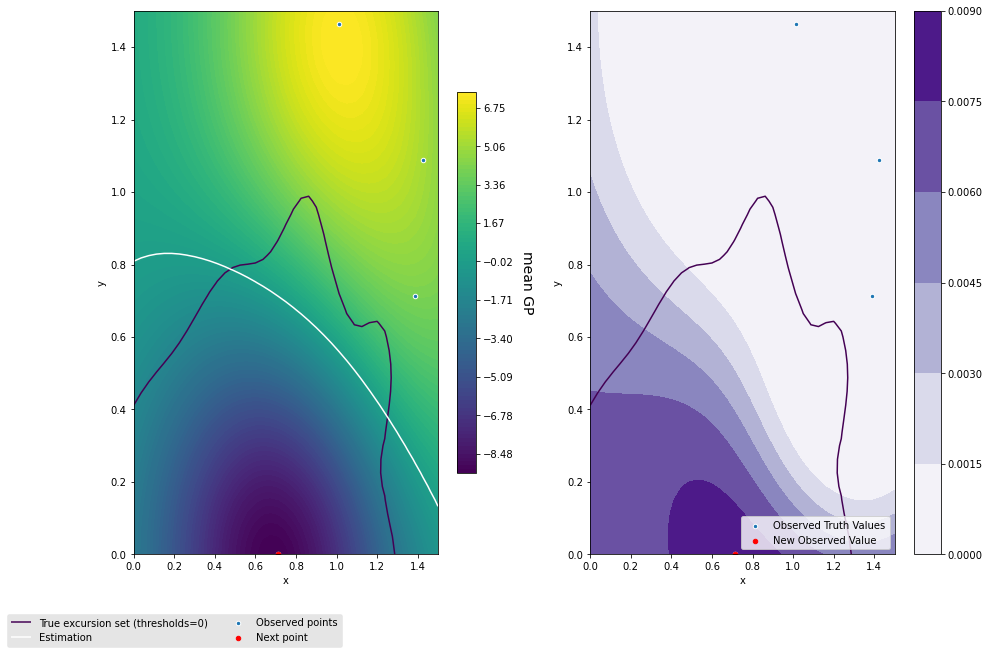

tensor([[0.8788]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.87


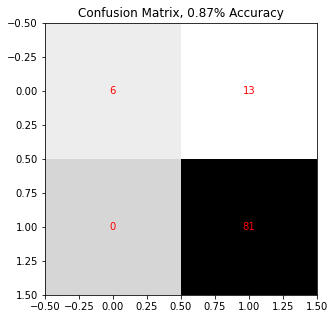

I am trying plotting


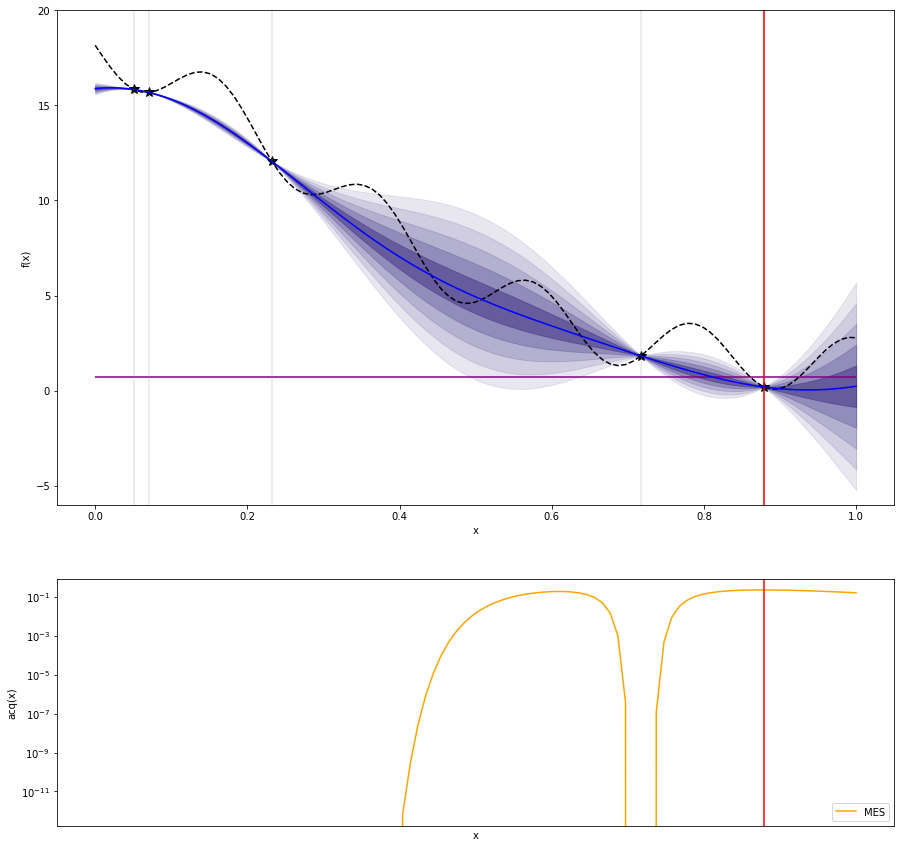

tensor([[0.0750, 0.8250]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.810232004759072


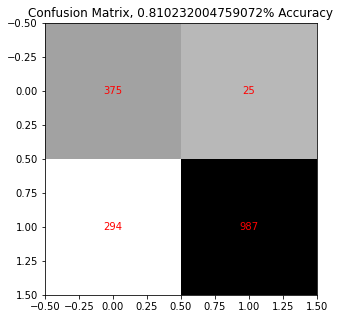

I am trying plotting


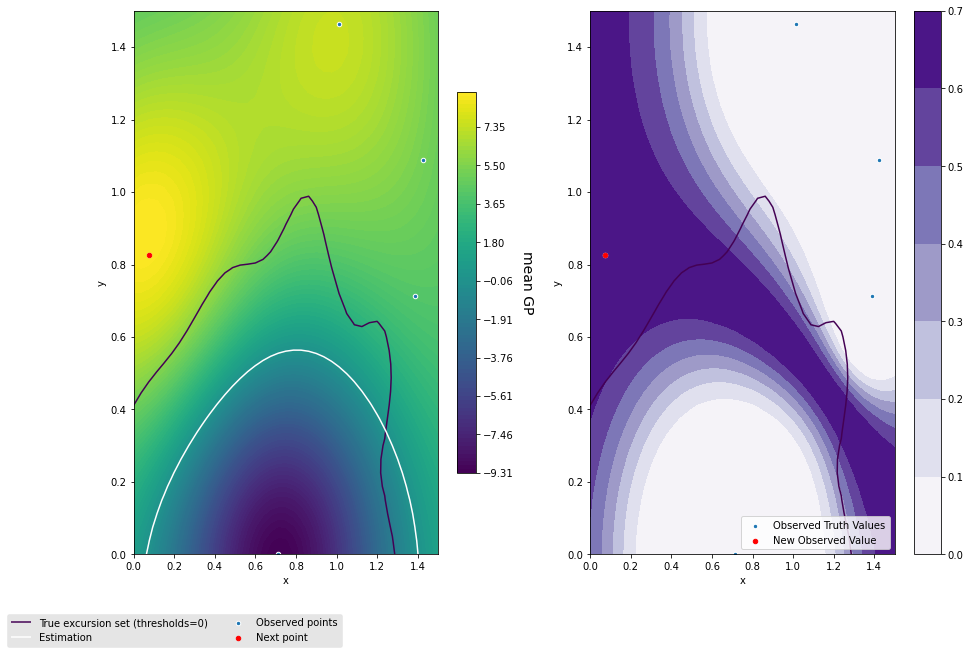

tensor([[0.8081]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.81


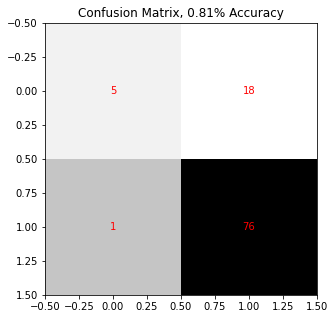

I am trying plotting


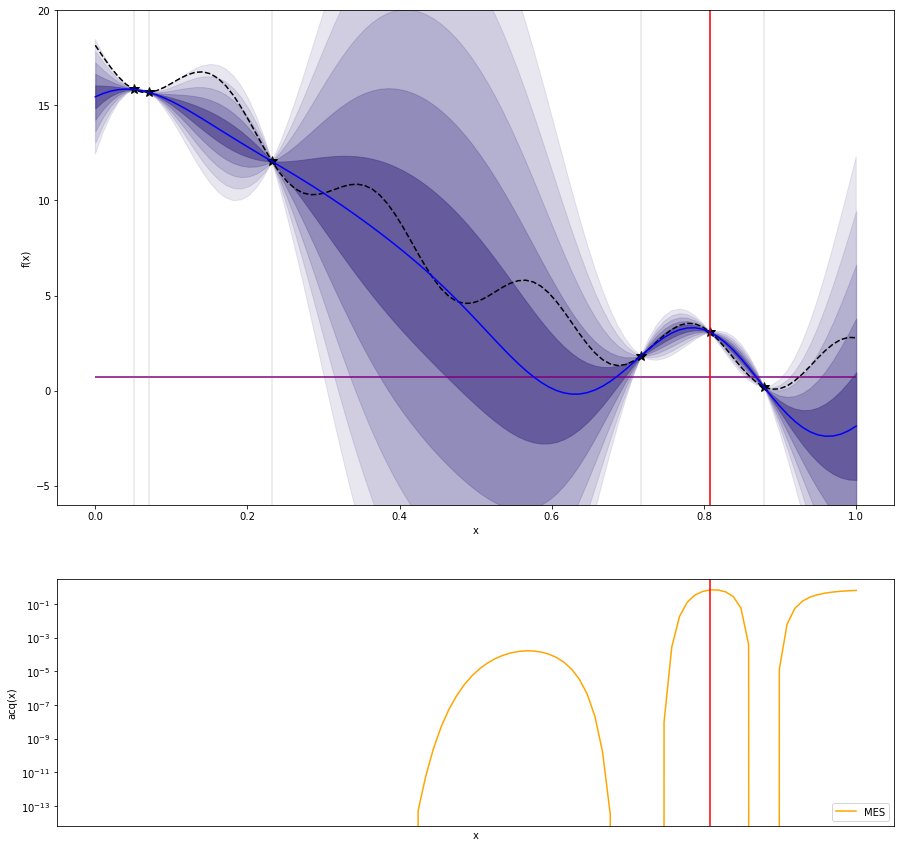

tensor([[1.2750, 0.3000]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8352171326591314


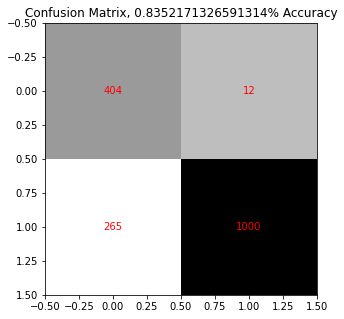

I am trying plotting


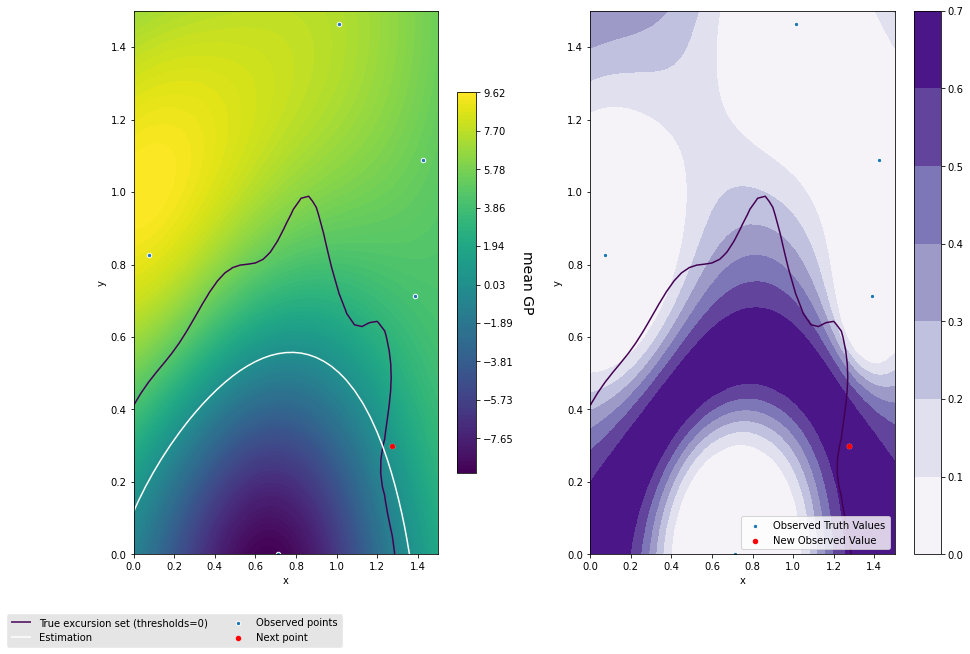

tensor([[0.5758]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.93


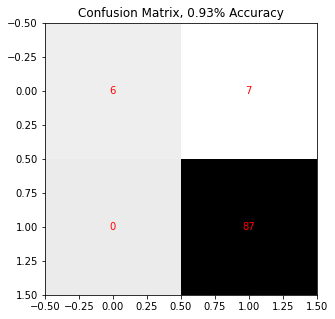

I am trying plotting


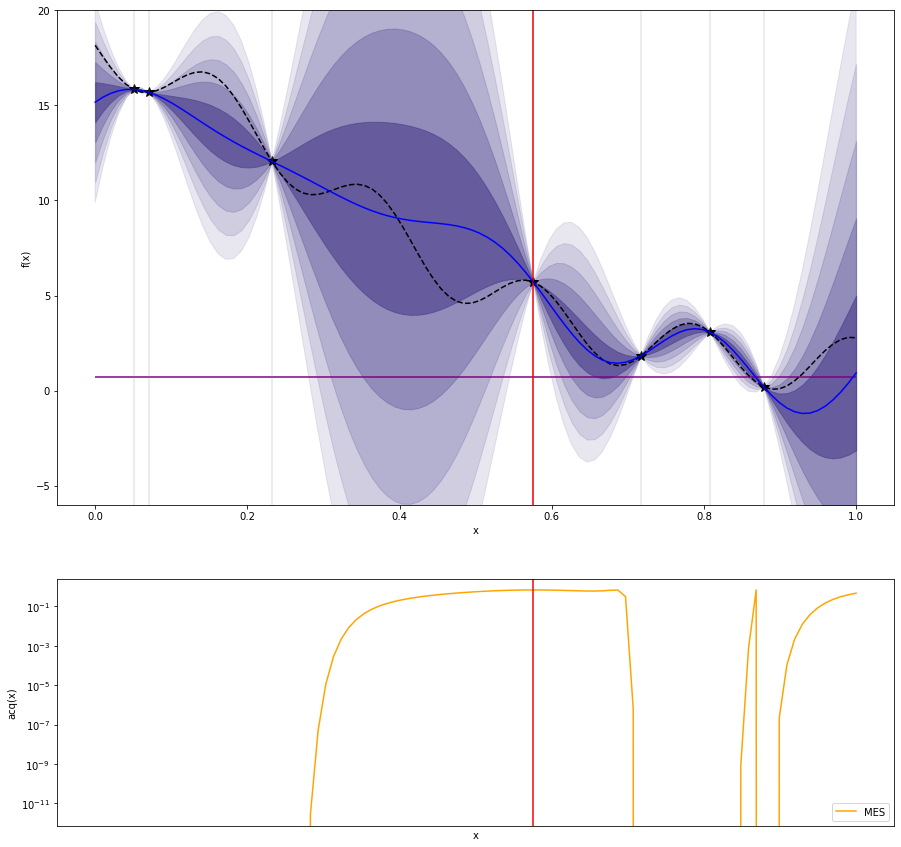

tensor([[1.2000, 0.3375]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8738845925044616


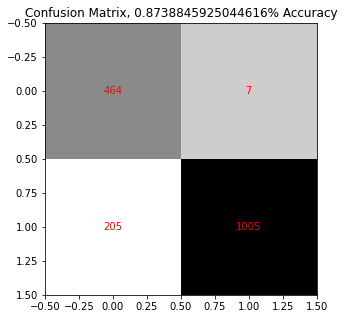

I am trying plotting


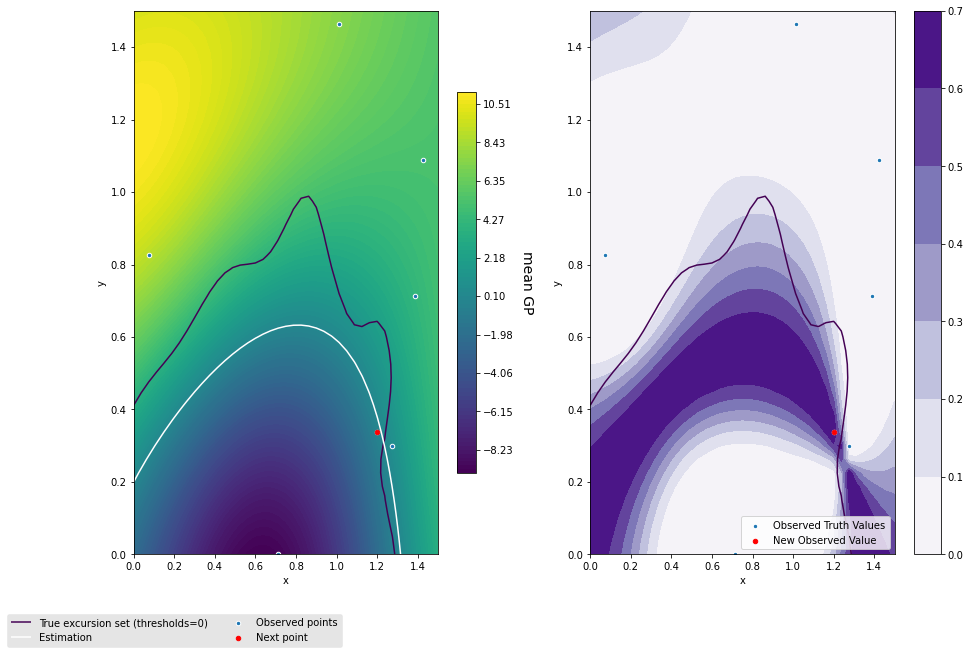

tensor([[1.]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.96


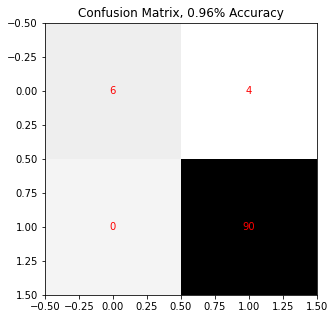

I am trying plotting


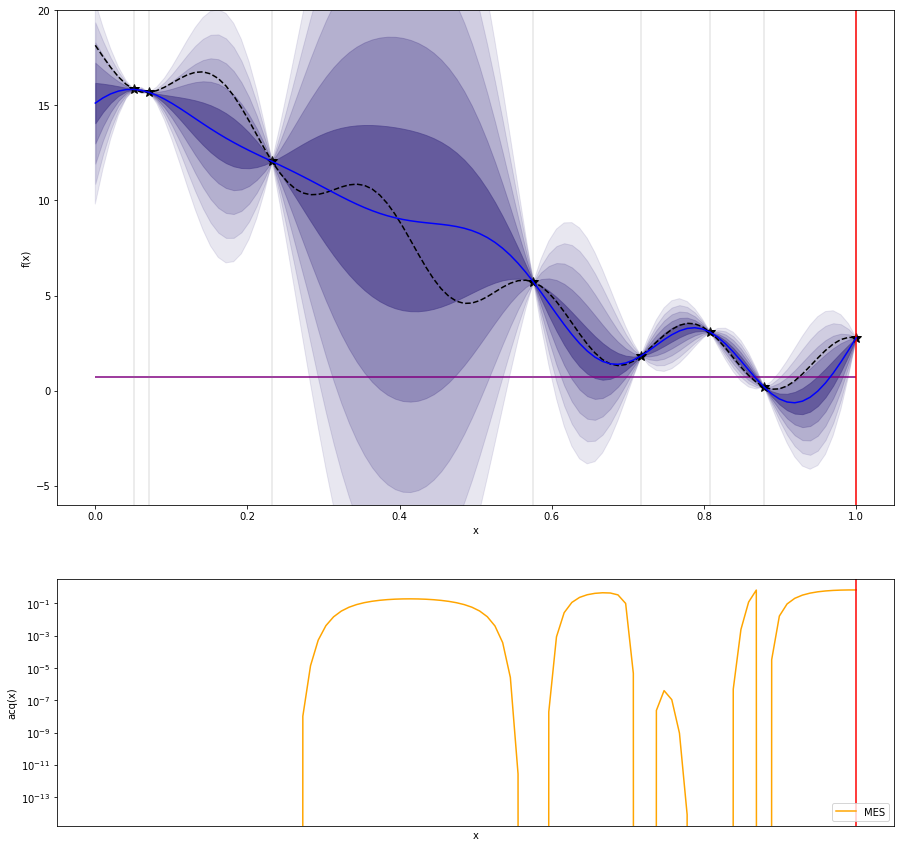

tensor([[0.1500, 0.3375]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9131469363474123


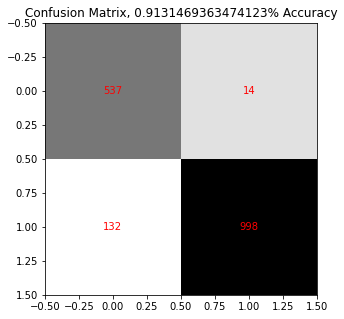

I am trying plotting


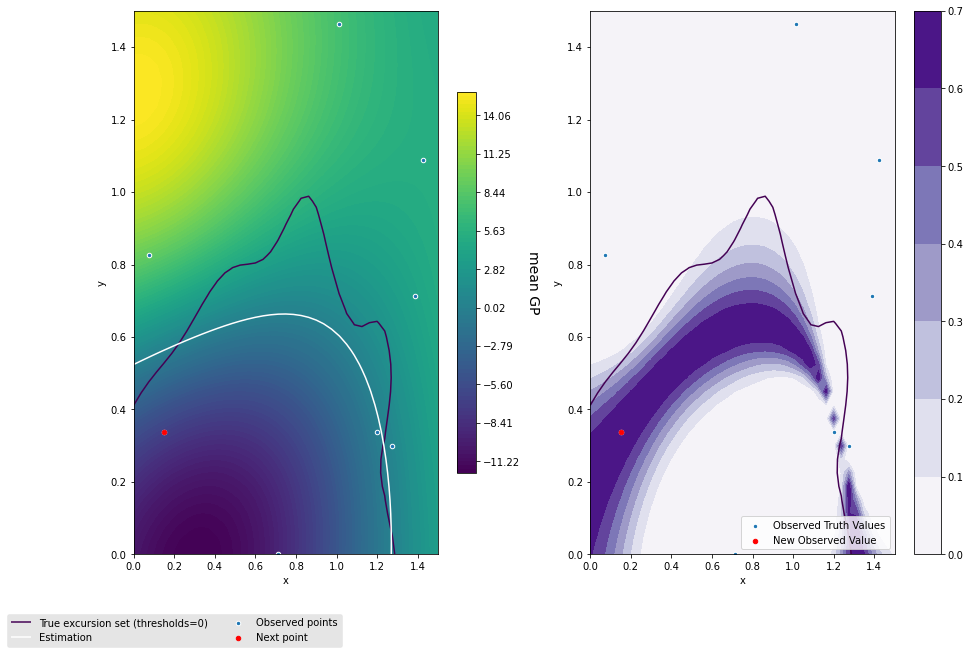

tensor([[0.9697]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.98


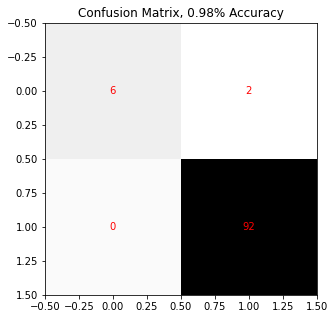

I am trying plotting


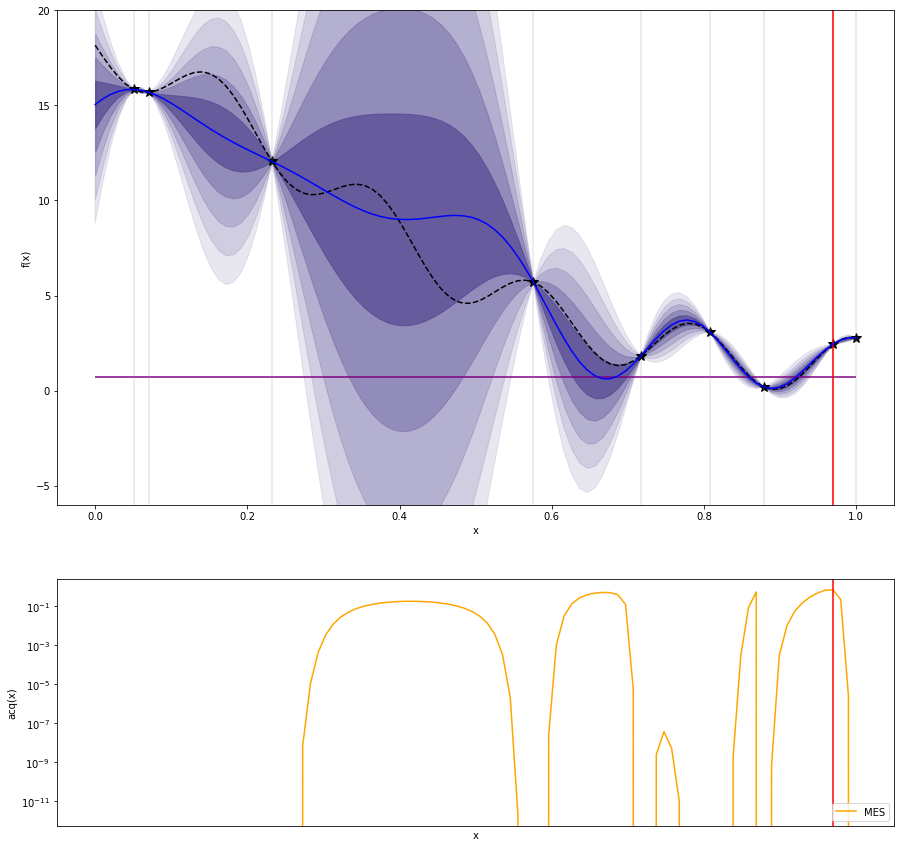

tensor([[0.4875, 0.6375]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9601427721594289


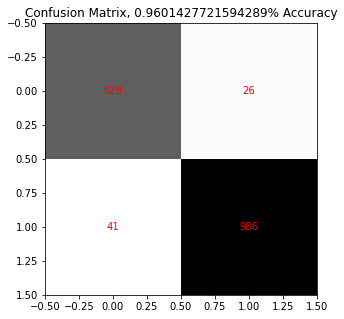

I am trying plotting


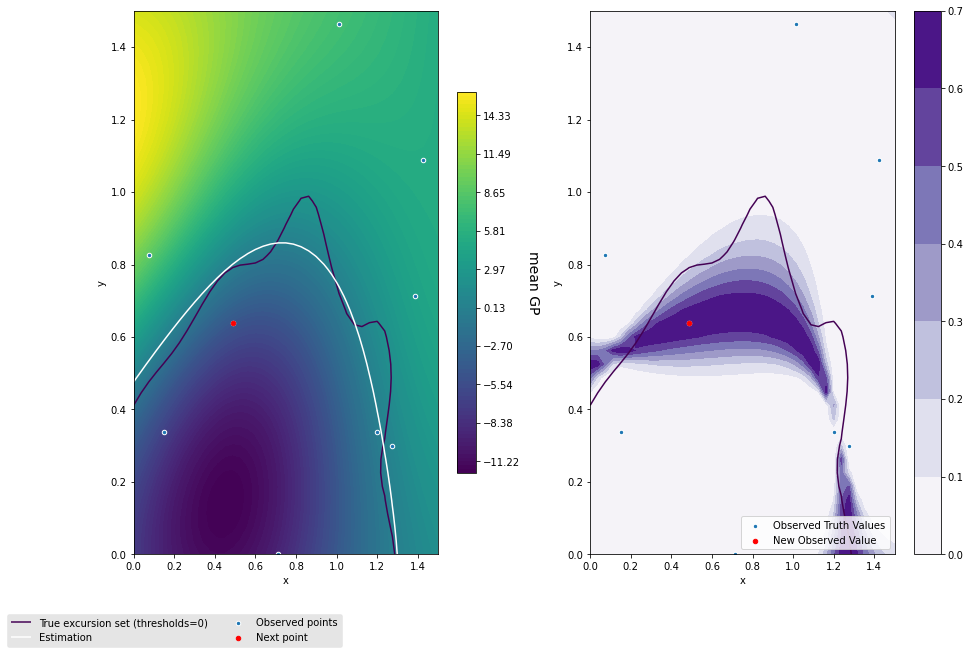

tensor([[0.6566]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


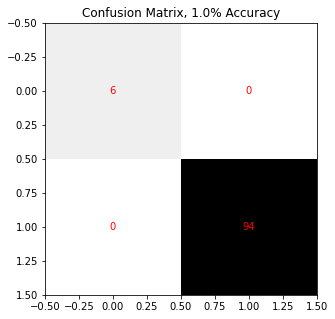

I am trying plotting


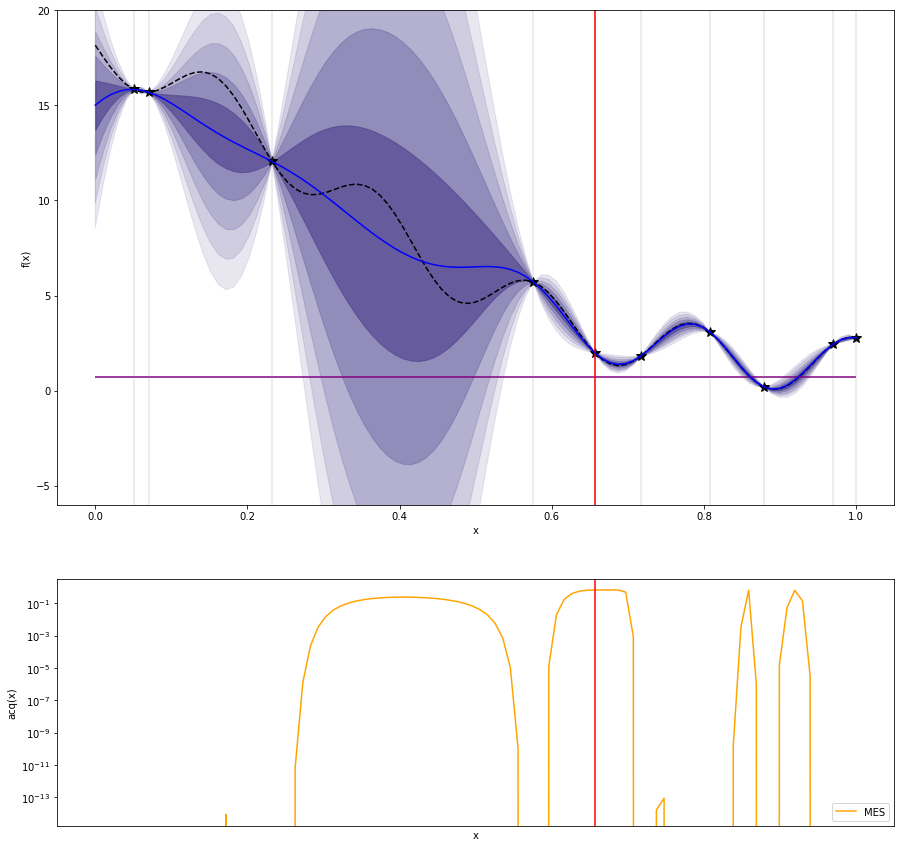

tensor([[0.9000, 0.8250]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9547888161808448


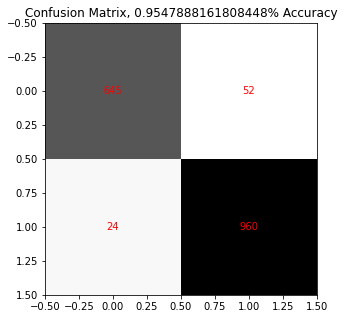

I am trying plotting


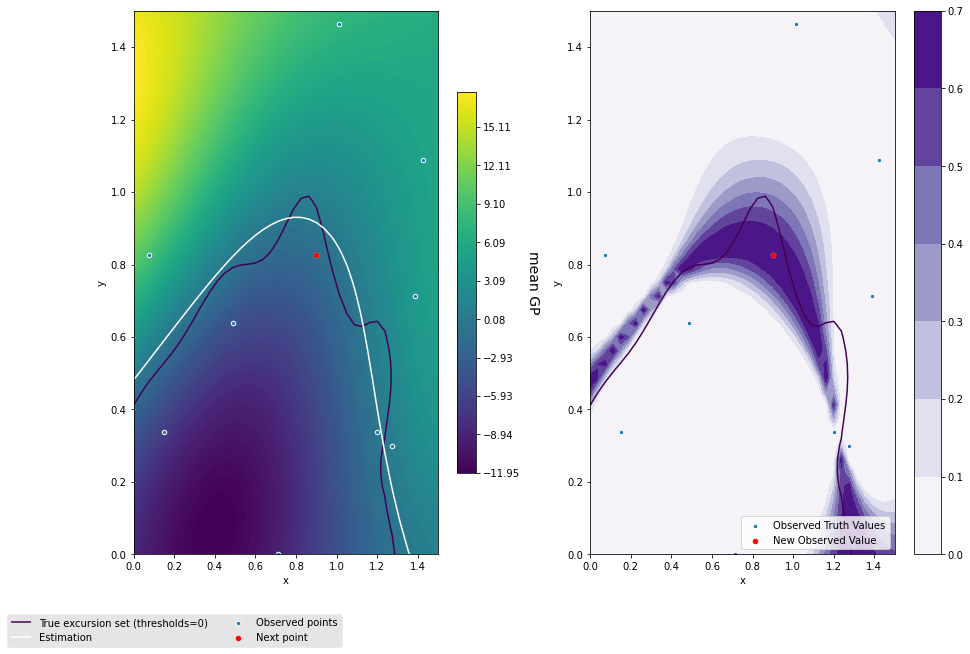

tensor([[0.9192]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


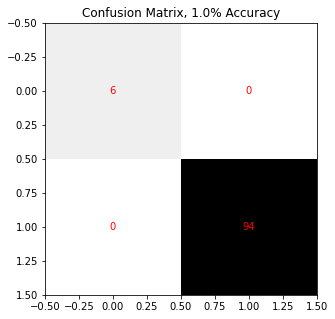

I am trying plotting


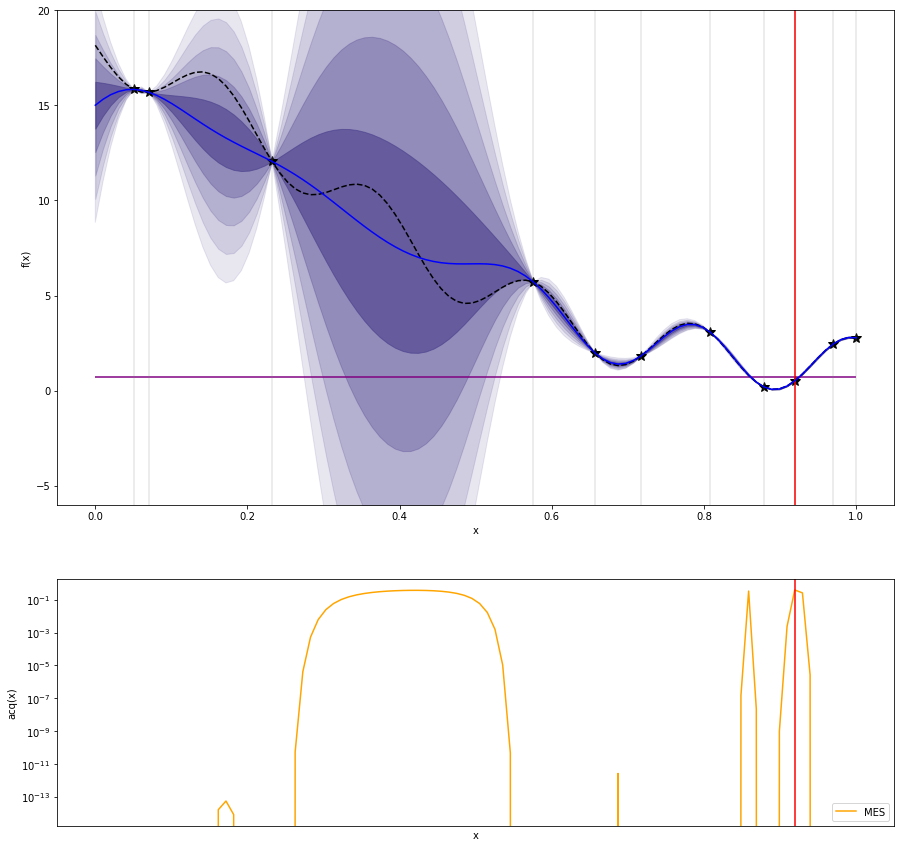

tensor([[0.3750, 0.7500]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9577632361689471


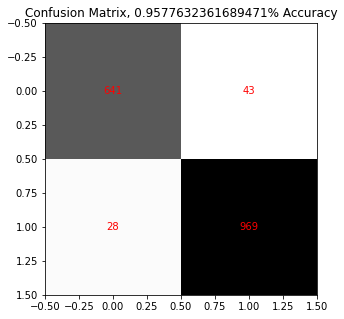

I am trying plotting


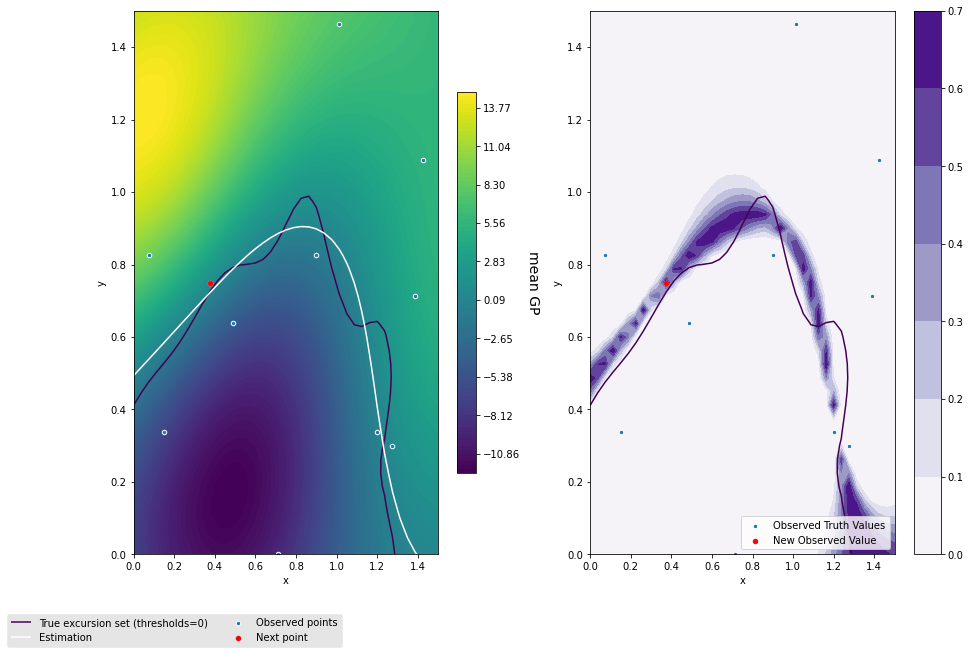

tensor([[0.4141]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


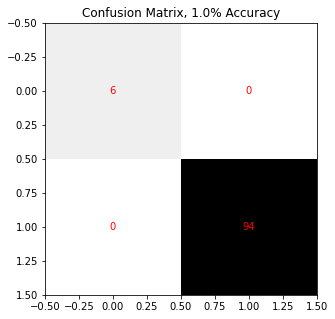

I am trying plotting


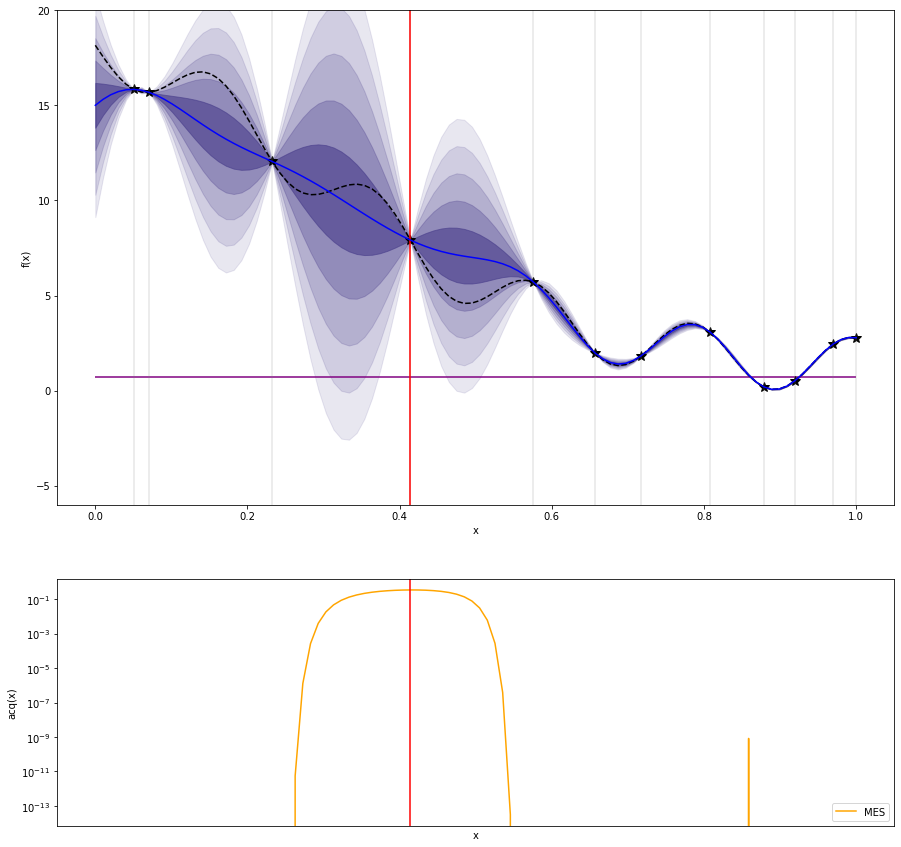

tensor([[1.3875, 0.0000]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9613325401546698


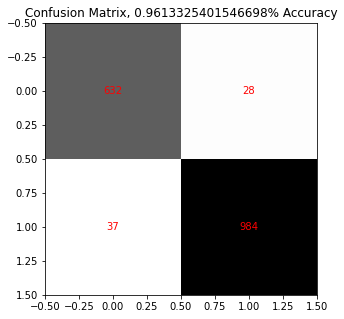

I am trying plotting


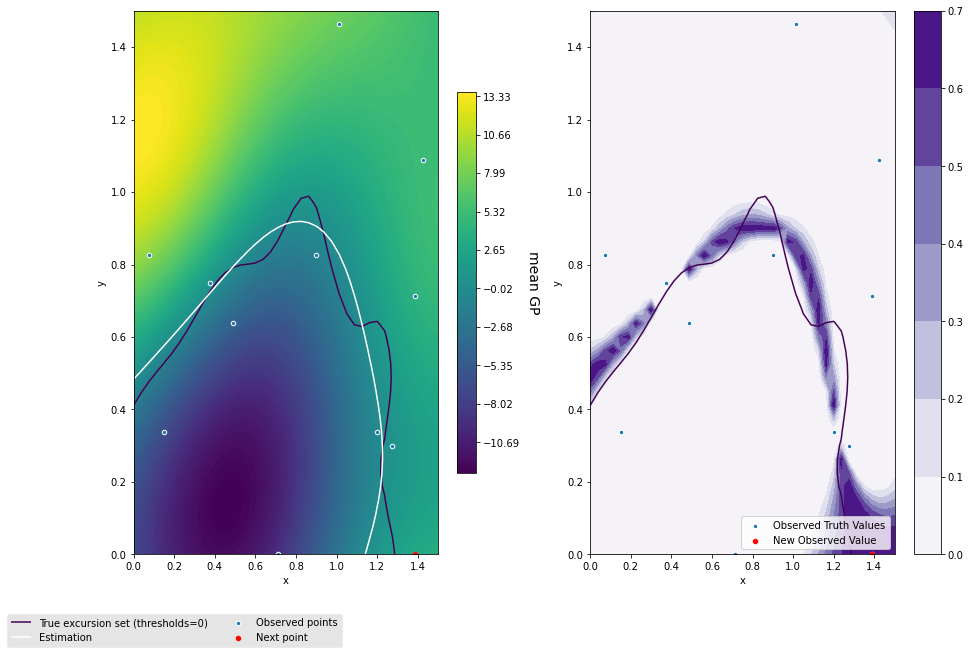

tensor([[0.3333]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


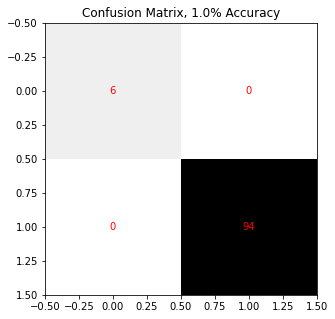

I am trying plotting


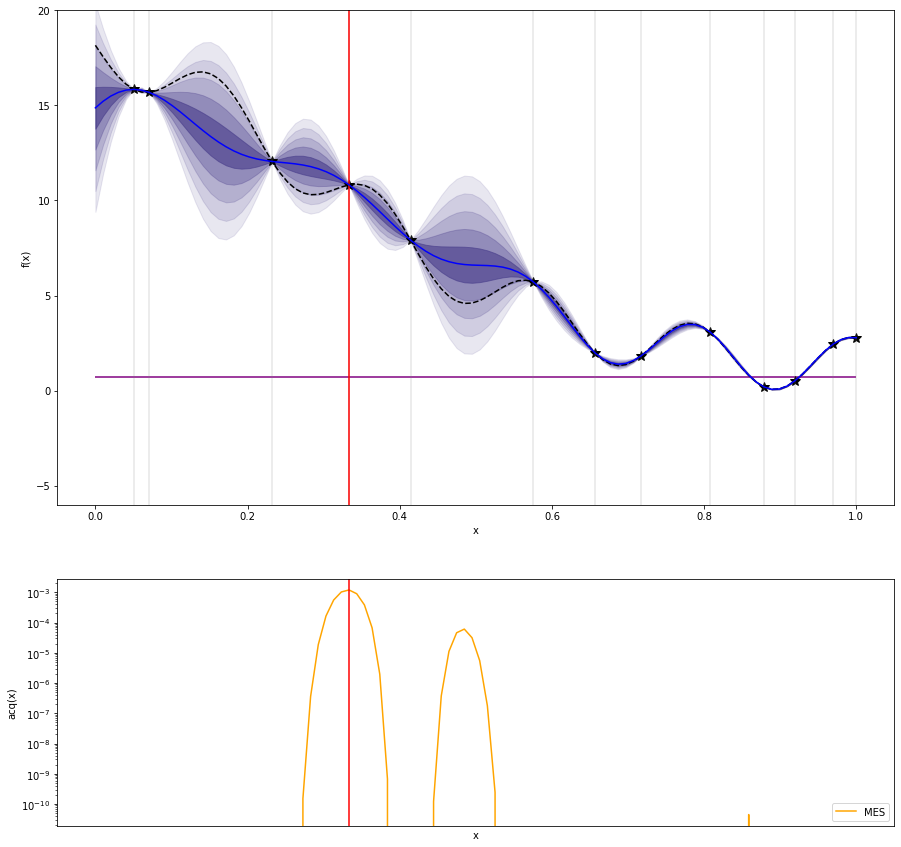

tensor([[0.1875, 0.6000]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9595478881618085


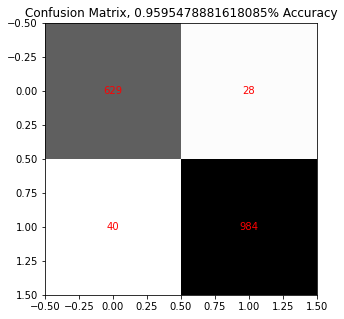

I am trying plotting


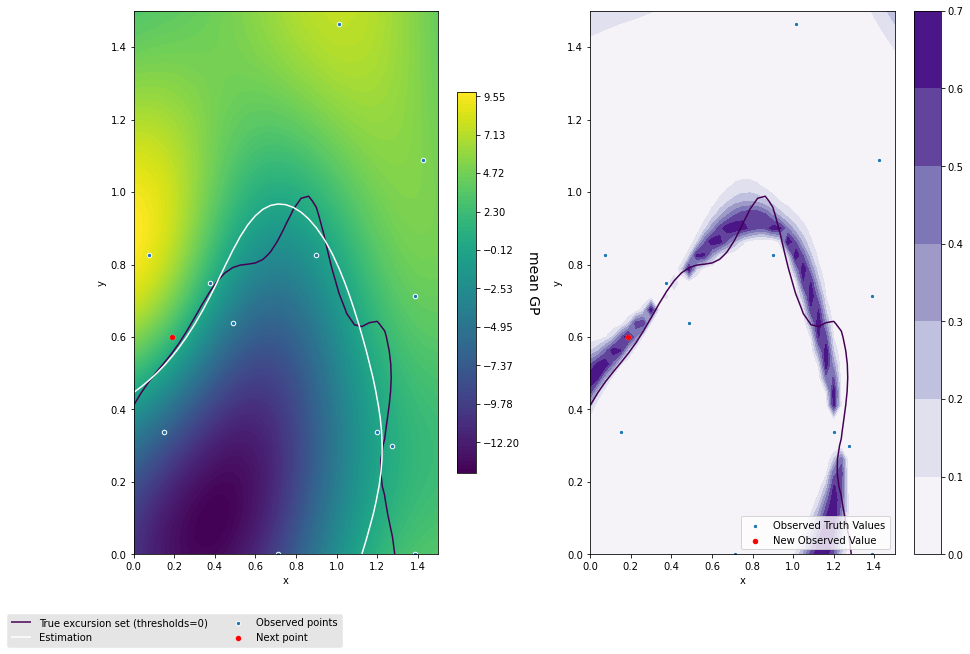

tensor([[0.4949]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


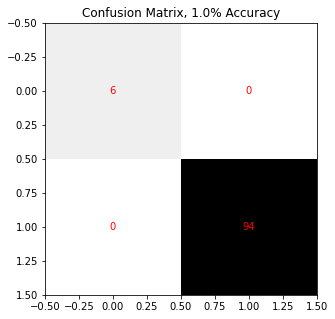

I am trying plotting


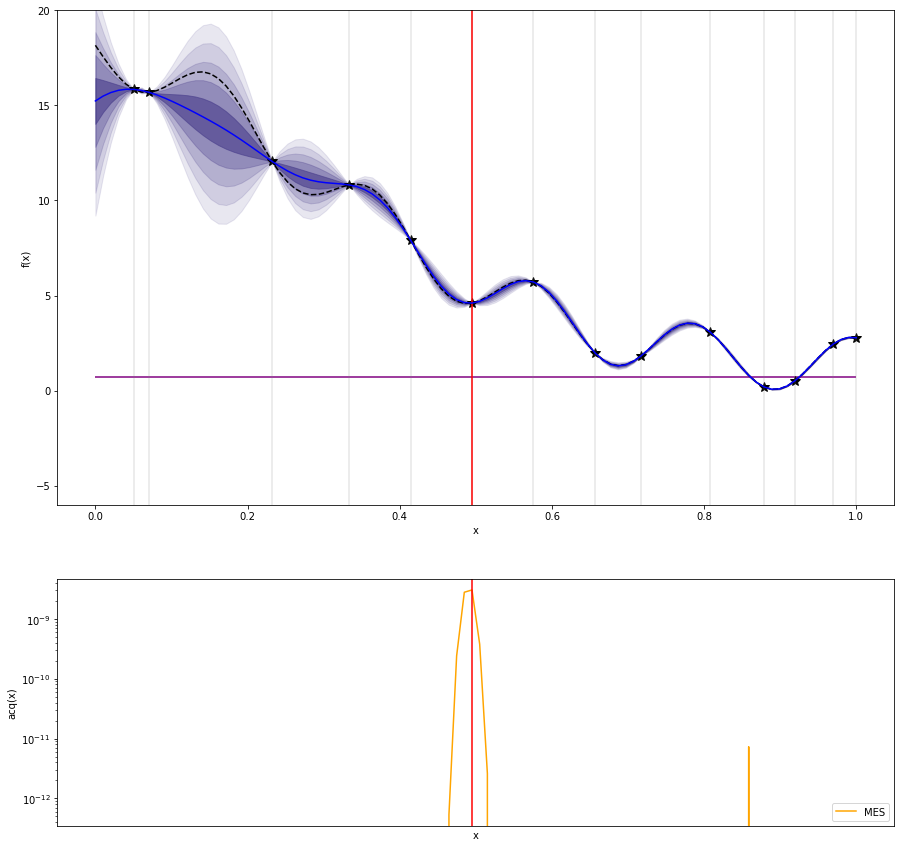

tensor([[1.0875, 0.6750]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9577632361689471


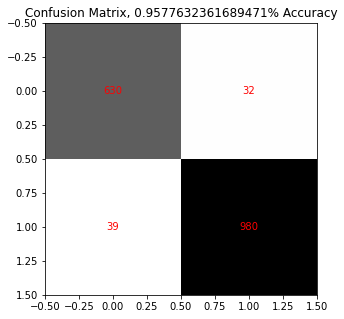

I am trying plotting


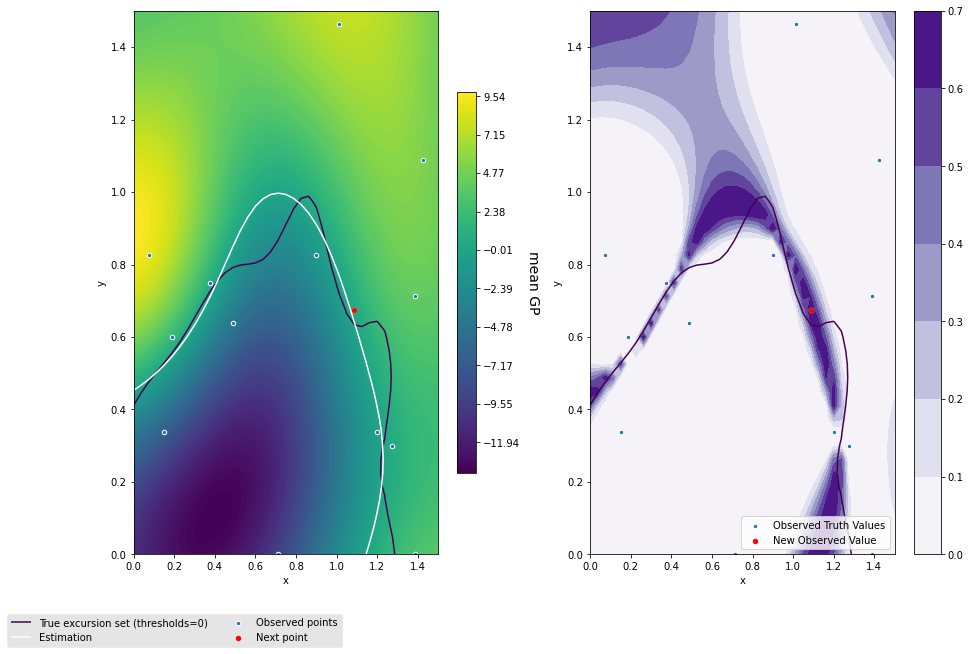

tensor([[0.8586]], device='cuda:0', dtype=torch.float64)


KeyboardInterrupt: 

In [22]:
for iteration in range(15):
    x_one = learner_one.ask()
    print(x_one)
    result_one = learner_one.evaluate_and_tell(x_one)
    plot(result_one, show_confusion_matrix=True)

#learner_two.run(15,plot_result=True)

# for iteration in range(15):
    x_two = learner_two.ask()
    print(x_two)
    result_two = learner_two.evaluate_and_tell(x_two)
    plot(result_two, show_confusion_matrix=True)



In [ ]:
learner_one.optimizer.result.train_X

In [ ]:
# #
# # If I do not have the function handle properly provided in the problem details I can use basic ask-and-tell.
# #
import excursion.test_suite.test_functions.fast_3D as testcase_3D


ndim = 3
thresholds = [0.0]
bounding_box = [[0.0, 1.5], [0.0, 1.5], [0, 1.5]]
grid_step_size = [41]*ndim
acq_grid_step_size = grid_step_size
problem_three_details = ExcursionProblem(thresholds=thresholds, bounding_box=bounding_box, ndim=ndim, grid_step_size=grid_step_size,
                                       functions=testcase_3D.true_functions)



learner_three = Learner(problem_three_details, algorithm_opts)

for iteration in range(15):
    x_three = learner_three.ask()
    new_y = testcase_3D.true_functions[0](x_three)
    print(x_three, new_y)
    result_three = learner_three.tell(x_three, new_y)
    plot(result_three, show_confusion_matrix=True)



In [ ]:
# 4D or nD example

file = open('../excursion/test_suite/algorithm_options/algorithm_specs_circle.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))

In [ ]:
import excursion.test_suite.test_functions.parabola_nD as testcase_nD
ndim = 5
thresholds = [1.0]
bounding_box = [[-2, 2]]*ndim
grid_step_size = [20]*ndim
acq_grid_step_size = grid_step_size
problem_n_details = ExcursionProblem(thresholds=thresholds, bounding_box=bounding_box, ndim=ndim, grid_step_size=grid_step_size,
                                       functions=testcase_nD.true_functions)

learner_four = Learner(problem_n_details, algorithm_opts)

for iteration in range(15):
    x_three = learner_four.ask()
    new_y = testcase_nD.true_functions[0](x_three)
    print(x_three, new_y)
    result_three = learner_four.tell(x_three, new_y)
    plot(result_three, show_confusion_matrix=True)